# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"

### Estudiantes:
- Alfredo Osiglia Rodríguez
- Laura Elena Betancourt Leal
- Luis Angel Motta Valero

#### <u>**Importante**</u>: Esta es una copia del notebook original, el cual se ha perdido. Los resultados se muestran en un documento PDF albergado en el siguiente enlace.

**Enlace:** https://drive.google.com/file/d/1Eqw_yPkUVoqsPH1DQ5RNO_HbhVdlsy7a/view?usp=sharing

## Descripción previa
La siguiente información es extraída del repositorio donde se almacena el dataset original (https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset).
### Nombre: Vegetable Image Dataset
Clasificación y reconocimiento de vegetales
### Contexto
El experimento inicial se realiza con 15 tipos de hortalizas comunes en todo el mundo. Las verduras elegidas para el experimento son: judía, calabaza amarga, calabaza de botella, berenjena, brécol, col, pimiento, zanahoria, coliflor, pepino, papaya, patata, calabaza, rábano y tomate. Se utiliza un total de **21000** imágenes de 15 clases, cada una de las cuales contiene 1400 imágenes de tamaño $224×224$ y en formato *$.jpg$. El conjunto de datos se divide en un 70% para la formación, un 15% para la validación y un 15% para las pruebas.

### Contenido
Este dataset contiene tres folders:

- train (15000 imágenes)
- test (3000 imágenes)
- validation (3000 imágenes)

Cada una de las carpetas anteriores contiene subcarpetas para distintos vegetales en las que están presentes las imágenes de los vegetales/hortalizas respectivos.

De acuerdo con lo anterior, las 15 clases son las siguientes:

$Y = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']$

## 1.	Carga	del	conjunto	de	datos

En	primer	lugar,	instalamos	la	API	de	Kaggle	y	procedemos	a	descargar	el	fichero	vegetable-image-dataset.zip	que	incluye	todas	las
imágenes	que	se	utilizarán	para	entrenar	a	la	red.	Este	fichero	se	descomprime	en	la	carpeta	my_dataset.

In [ ]:
%%capture
# Instalación de la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     -------------------------------------- 83.6/83.6 kB 334.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=b3f5428a501bf6a63cda54ccf9098209972a08a55a82d3e90b7cf67616ac33dd
  Stored in directory: c:\users\user eat\appdata\local\pip\cache\wheels\d2\ed\a5\da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "angelm97"
os.environ['KAGGLE_KEY'] = "b2d97666b7674148aa715f3cf203f73e"

In [ ]:
#	Descargamos	el	dataset	proveniente	de	Kaggle
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 533M/534M [00:04<00:00, 149MB/s]
100% 534M/534M [00:04<00:00, 120MB/s]


In [7]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
%%capture
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip vegetable-image-dataset.zip -d my_dataset

Streaming output truncated to the last 5000 lines.
  inflating: my_dataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0012.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0013.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0014.jpg  
  inflating: my_dataset/Vegetable Image

In [9]:
%%capture
!ls test/

## 2.	Inspección	del	conjunto	de	datos

En	este	apartado	hacemos	una	exploración	inicial	de	los	datos	para	confirmar	que	tienen	la	estructura	adecuada.

In [ ]:
#Verificamos	si	todas	las	imágenes	tienen	el	mismo	tamaño
import	os
from PIL import Image
def	check_image_sizes_recursive(folder_path):
    for	root, dirs, files in os.walk(folder_path):
        for file in	files:
            if	file.lower().endswith('.jpg'):
                file_path = os.path.join(root,	file)
                with Image.open(file_path) as img:
                    width, height = img.size
                    if width != 224 or height != 224:
                        print(f"File: {file_path} - Size: {width}x{height}")

#Mostramos	los	datos	y	ubicación	de	las	imágenes	que	no	cumplen	con	el	tamaño	de	224x224	píxeles
folder_path = './drive/MyDrive/my_dataset'
check_image_sizes_recursive(folder_path)

Se observa que algunas imágenes de la clase 'Papaya' y otras de la clase 'Bitter_Gourd' tienen un tamaño distinto a 224 x 224. Las imágenes en cuestión son las siguientes:

**Clase 'Bitter_Gourd':**

Train: 3 imágenes.
- 0526.jpg	-	Size:	224x205
- 0430.jpg	-	Size:	224x193
- 0609.jpg	-	Size:	224x200

**Clase 'Papaya':**

Test: 1 imagen.
- 1246.jpg	-	Size:	224x207

Train: 3 imágenes
- 0741.jpg	-	Size:	224x210
- 0126.jpg	-	Size:	224x211
- 0176.jpg	-	Size:	224x198

Validation: 2 imágenes
- 1138.jpg	-	Size:	224x187
- 1150.jpg	-	Size:	224x223

Todas	las	imágenes	tienen	un	width	the	224px	pero	no	todas	tienen	la	misma	altura.	Al	asignar	el atributo	"padding=same"	a	las primeras	capas	convolucionales,	Tensorflow	añadirá	un	padding	de	ceros	(píxeles	de color	negro)	a	estas	imágenes	para	que	cumplan con	la	altura	de	224px	del	resto	de	imágenes.	Esto	no debería	suponer	un	inconveniente	para	la	red	debido	a	que	son	muy	pocas imágenes	a	las	que	se	hará	esta	padding	con	respecto	al	tamaño	del	dataset.

A	continuación,	se	separan	los	datos	en	conjuntos	de	train,	test	y	validation	de	acuerdo	a	como	están estructurados	en	el	fichero	de Kaggle	y	se	hace	visualizan	imágenes	aleatorias	para	confirmar	que	se	han	cargado	de	manera	correcta.

In [ ]:
# Creamos una función para guardar las imágenes en tensores
import tensorflow as tf
from pathlib import Path
path = '/content/my_dataset/Vegetable Images'
#Se	ha	fijado	el	batch_size	que	viene	por	defecto	en	la	documentación
def load_dataset(subfolder,	batch_size=32):
    dataset_path = path + subfolder
    data_dir = Path(dataset_path)
    params = {
        'directory': data_dir,
        'seed':	0,
        'batch_size': batch_size,
        'image_size': (224,224)
        }
    dataset_params = {**params}
    dataset	= tf.keras.utils.image_dataset_from_directory(**dataset_params)
    return dataset

In [ ]:
# Guardamos los diferentes conjuntos de imágenes en variables
print('>> Training Set:')
train_ds = load_dataset('/train')
print('>> Testing Set:')
test_ds = load_dataset('/test',	None)
print('>> Validation Set:')
val_ds = load_dataset('/validation')

In [ ]:
# Definimos las clases
class_names = test_ds.class_names
class_names

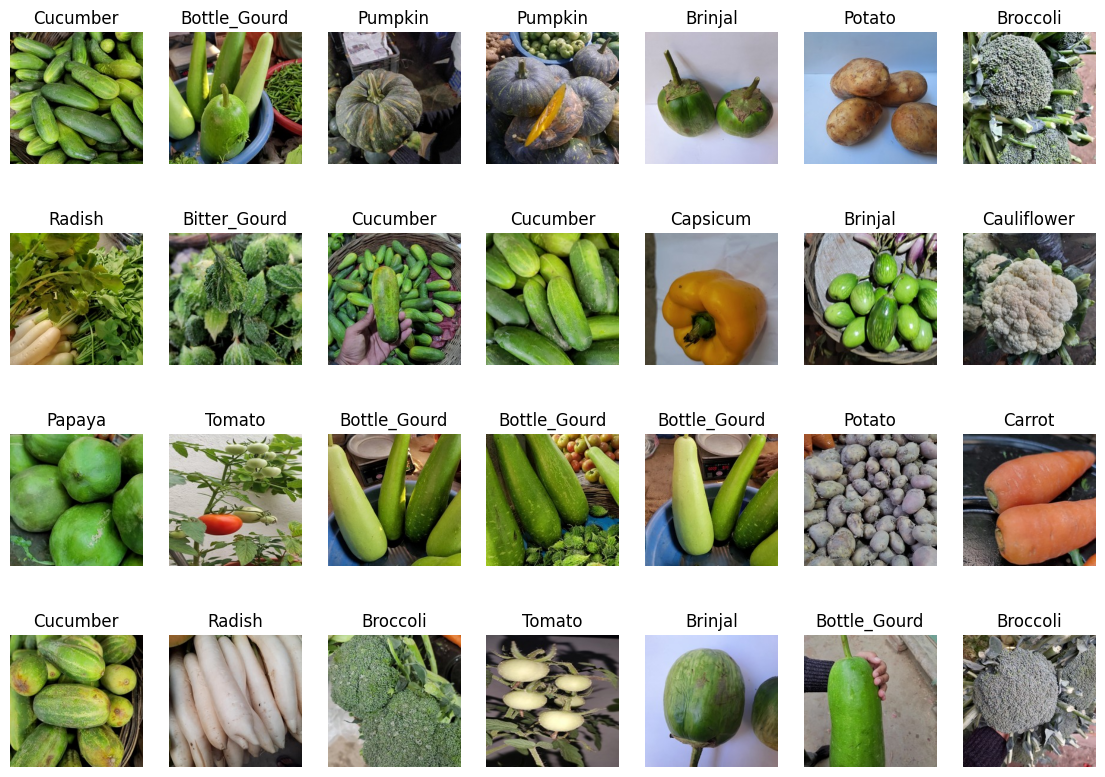

In [ ]:
# Visualización de los datos de train
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
for images, labels in train_ds.take(1):
    for i in range(21):
        ax = plt.subplot(4, 7, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## 3.	Acondicionamiento	de	los	datos

Teniendo	ya	las	imágenes	cargadas	en	el	entorno	y	subdivididas	en	conjuntos	de	train,	validation	y test; se	procede	a	normalizar	las imágenes	para	todos	los	conjuntos	y	a	codificar	las	etiquetas	usando	One-Hot Encoding	únicamente	para	el	train	y	validation.

In [ ]:
# Normalización y aplicación de One-hot Encoding

from tensorflow.keras.layers import	Rescaling, CategoryEncoding

# Creación de una capa de re-escalado (normalización de datos)
rescaling_layer = Rescaling(1.0/255)

# Conversión a one-hot encoding
OHE = CategoryEncoding(num_tokens=15, output_mode="one_hot")

# Aplicamos normalización a cada imagen del dataset y OHE a las etiquetas
norm_train = train_ds.map(lambda x,y: (rescaling_layer(x), OHE(y)))
norm_val = val_ds.map(lambda x,y: (rescaling_layer(x), OHE(y)))

In [ ]:
# Separamos el conjunto de test entre imágenes y sus etiquetas
# Se utilizarán para evaluar la precisión del modelo
import numpy as np

x_test = []
y_test = []
norm_test = test_ds.map(lambda x,y: (rescaling_layer(x), y)) # dejamos intactas las etiquetas (y)

for image, label in norm_test.take(len(norm_test)):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
print("Test	set	shape:")
print(f'Images:	{x_test.shape}')
print(f'Labels:	{y_test.shape}')

## 4.1	Desarrollo	y	entrenamiento	de	un	modelo	desde	cero	o from	scratch

En	este	apartado	se	procede	a	entrenar	un	modelo	"from	scratch"	definiendo	la	arquitectura	desde cero, observando	cómo	se	comporta en	el	entrenamiento	y	aplicando	técnicas	de	regularización	para	mejorar	su rendimiento.	Partimos	de	una	arquitectura	con	tres	bloques convolucionales	sobre	los	que	únicamente	se	aplica	max pooling	antes	de	pasar	al	siguiente	bloque	y	una	capa	MLP	sin	ningún	tipo	de regularización.	Luego aplicamos las	técnicas	de	batch	normalization	y	dropout	para	observar	cómo	cambia	el	accuracy.	En	el	tercer modelo	se	aplicará	la	técnica	de	Early	Stopping.	Finalmente,	aplicamos	la	técnica	de	Data	Augmentation para intentar	reducir	aún	más	el overfitting.

## 4.1.1	Modelo	from	scratch	únicamente	con	max	pooling

### Definición del modelo

In [ ]:
# Importamos las librerías necesarias
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

#########################################
###### Definimos la arquitectura ########
#########################################
#BASE MODEL
# Definimos entradas
inputs = Input(shape=(224, 224, 3))

# Primer set de capas CONV
x1 = Conv2D(32, (3,	3),	padding="same",	activation="relu")(inputs)
x1 = Conv2D(32, (3,	3),	padding="same",	activation="relu")(x1)
x1 = MaxPooling2D(pool_size=(2,	2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV
x2 = Conv2D(64,	(3,	3),	padding="same",	activation="relu")(x1)	#(X)
x2 = Conv2D(64,	(3,	3),	padding="same",	activation="relu")(x2)	#(X)
x2 = MaxPooling2D(pool_size=(2,	2))(x2)	#(X)

#	Tercer	set	de	capas	CONV
x3 = Conv2D(256,	(3,	3),	padding="same",	activation="relu")(x2)	#(X)
x3 = Conv2D(256,	(3,	3),	padding="same",	activation="relu")(x3)	#(X)
x3 = MaxPooling2D(pool_size=(2,	2))(x3)	#(X)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)	#(X)
xfc = Dense(512,	activation="relu")(xfc)
predictions = Dense(15,	activation="softmax")(xfc)	#(X)

### Compilación	del	modelo

In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y outputs
model_cnn = Model(inputs=inputs, outputs=predictions)	#(X)
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.001,	beta_1=0.9,	beta_2=0.999,	epsilon=1e-08),
                  metrics=["accuracy"])	#(X)

n_epochs=20

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
# IMPORTANTE (Consultar la documentación)
H = model_cnn.fit(norm_train, validation_data=norm_val, batch_size=128, epochs=n_epochs, verbose=1)	#(X)

### Evaluación	del	modelo

Como	era	de	esperar,	el	modelo	presenta	una	cantidad	importante	de	overfitting	debido	a	que	no	se	ha aplicado	ninguna	técnica	de regularización	más	allá	del	max	pooling.	Se	observa	que	en	la	última	época	el	modelo no	solo	no	mejora	si	no	que	parece	tener tendencia	a	divergir.

In [ ]:
from sklearn.metrics import classification_report

#	Muestro	gráfica	de	accuracy	y	losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"],	label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"],	label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"],	label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"],	label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo de red neuronal...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(x_test,	batch_size=128)	#(X)
# Sacamos el report para test
print(classification_report(y_test,	predictions.argmax(axis=1),	target_names=class_names))	#(X)

## 4.1.2	Modelo	from	scratch	aplicando	max	pooling,	batch normalization	y	droput

### Definición	del	modelo

In [ ]:
# Importamos las librerías necesarias
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

n_epochs=50
#########################################
###### Definimos la arquitectura ########
#########################################
#BASE MODEL
# Definimos entradas
inputs = Input(shape=(224, 224, 3))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
x2 = Dropout(0.25)(x2) #(X)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = MaxPooling2D(pool_size=(2, 2))(x3) #(X)
x3 = Dropout(0.25)(x3) #(X)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3) #(X)
xfc = Dense(512, activation="relu")(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.5)(xfc) #(X)
# Clasificador softmax
predictions = Dense(15, activation="softmax")(xfc) #(X)

### Compilación	del	modelo

In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_cnn = Model(inputs=inputs, outputs=predictions) #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="categorical_crossentropy",
#                 loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                  metrics=["accuracy"]) #(X)

n_epochs=20

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
# IMPORTANTE (Consultar la documentación)
H = model_cnn.fit(norm_train, validation_data=norm_val, batch_size=128, epochs=n_epochs, verbose=1)	#(X)

### Evaluación	del	modelo

Aquí	se	puede	apreciar	una	mejora	considerable	del	overfitting	visto	en	el	modelo	anterior,	donde	en	la última	epoch	la	diferencia	entre validation	loss	y	training	loss	es	menor	a	0.1.	Es	interesante destacar	el	pico	validation	loss	en	la	epoch,	que	puede	ser	causa	de diversos	factores,	como sensibilidad del	modelo	durante	la	inicialización	o	una	variabilidad	marcada	en	el	batch	de	validación	para	esa epoch. 

En	este	modelo	se	ha	alcanzado	un	f1-score	perfecto	para	la	detección	de	capsicum	(pimiento).	En	el modelo	anterior	el	valor	de	este vegetal	también	fue	el	más	alto	con	un	valor	de	0.97.

In [ ]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluación del modelo
print("[INFO]: Evaluando el modelo de red neuronal...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(x_test, batch_size=128) #(X)
# Sacamos el report para test
print(classification_report(y_test, predictions.argmax(axis=1), target_names=class_names)) #(X)

## 4.1.3	Modelo	from	scratch	aplicando	Early	Stopping
### Definición	de	callbacks	para	Early	Stopping	y	compilación

Hasta	ahora	se	ha	realizado	el	entrenamiento	de	la	red	con	un	número	de	epochs	igual	a	20.	Ahora	se aplica	un	Early	Stopping	con patience=3	y	se	espera	tener	un	número	de	epochs	distinto	al	finalizar	el	entrenamiento

In [ ]:
#	Unimos	las	entradas	y	el	modelo	mediante	la	función	Model	con	parámetros	inputs	y	ouputs	(Consultar	la	documentació
model_cnn	=	Model(inputs=inputs,	outputs=predictions)	#(X)
#	Compilar	el	modelo
print("[INFO]:	Compilando	el	modelo...")
model_cnn.compile(loss="categorical_crossentropy",
#                 loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001,	beta_1=0.9,	beta_2=0.999,	epsilon=1e-08),
                  metrics=["accuracy"])	#(X)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     patience=3,	# Valor de patience con mejor resultado entre 2-5
                                     mode='min'),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/',
                                       monitor='val_accuracy',
                                       save_weights_only=True,
                                       mode='max'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

n_epochs=50

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
# IMPORTANTE (Consultar la documentación)
H = model_cnn.fit(norm_train, validation_data=norm_val, batch_size=128, epochs=n_epochs, verbose=1, callbacks=my_callbacks)

### Evaluación	del	modelo

El	modelo	se	detiene	en	la	época	9.	Aunque	no	hay	mejora	en	el	overfitting	con	respecto	al	modelo	anterior, el	tiempo	de	entrenamiento se	ha	reducido	a	la	mitad.	Los	resultados	de	test	son	parecidos	a	los	obtenidos	en	el	modelo	4.1.1.

In [ ]:
#	Muestro	gráfica	de	accuracy	y	losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 9), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 9), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 9), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 9), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo de red neuronal...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(x_test, batch_size=128)	#(X)
# Sacamos el report para test
print(classification_report(y_test,	predictions.argmax(axis=1), target_names=class_names))	#(X)

## 4.1.4	Modelo	from	scratch	aplicando	Data	Augmentation

### Generación	de	contenedor	DataGenerator	para	el	aumento	automático	de muestras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=12,	    # grados de rotacion aleatoria
    width_shift_range=0.2,	# fraccion del total (1) para mover la imagen
    height_shift_range=0.2,	# fraccion del total (1) para mover la imagen
    horizontal_flip=True,	# girar las imagenes horizontalmente (eje vertical)
    #	shear_range=0,	#	deslizamiento
    zoom_range=0.2,	# rango de zoom
    #	fill_mode='nearest',	#	como	rellenar	posibles	nuevos	pixeles
    #	channel_shift_range=0.2	#	cambios	aleatorios	en	los	canales	de	la	imagen
)

In [ ]:
# Carga del conjunto de test
# Los datos de train y validation se cargan durante el entrenamiento del modelo
import numpy as np
test_aug = load_dataset('/test',	None)
x_test_aug = []
y_test_aug = []
# norm_test = test_aug.map(lambda x,y: (rescaling_layer(x),	y))
for image, label in test_aug.take(len(test_aug)):
    x_test_aug.append(image)
    y_test_aug.append(label)
x_test_aug = np.array(x_test_aug)
y_test_aug = np.array(y_test_aug)
# Guardamos las clases en una variable
class_names_aug = test_aug.class_names

### Inspección	de	muestras	generadas	sintéticamente

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.backend import expand_dims
import matplotlib.pyplot as plt
%matplotlib	inline

# Tomamos uno de los ejemplos de imágenes de train
for images, labels in train_ds.take(1):
    sample = np.random.randint(len(images))
    sample_train_x = images[sample]
    sample_class = class_names_aug[labels[sample]]
plt.imshow(sample_train_x.numpy().astype('uint8'))
plt.title(sample_class)
plt.axis('off')
plt.show()

# Visualizamos las transformaciones hechas por la técnica de Data Augmentation
fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(expand_dims(sample_train_x,	axis=0),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

### Definición	del	modelo

In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_aug =	Model(inputs=inputs, outputs=predictions)	#(X)
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy",
#                 loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001,	beta_1=0.9,	beta_2=0.999,	epsilon=1e-08),
                  metrics=["accuracy"])	#(X)
callbacks_aug	=	[
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/data_aug',
                                       monitor='val_loss',
                                       save_best_only=True,
                                       mode='min'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

num_epoch=20

#	Entrenamiento	de	la	red
print("[INFO]: Entrenando la red...")
#	IMPORTANTE	(Consultar	la	documentación)
H_aug = model_aug.fit(datagen.flow_from_directory(path + '/train',
                                                  target_size=(224,	224),
                                                  color_mode='rgb',
                                                  classes=class_names_aug,
                                                  class_mode='categorical',
                                                  batch_size=32,
                                                  shuffle=True,
                                                  seed=0),
                       # steps_per_epoch = len(norm_train)/128,
                       validation_data=datagen.flow_from_directory(path	+	'/validation',
                                                                   target_size=(224,	224),
                                                                   color_mode='rgb',
                                                                   classes=class_names_aug,
                                                                   class_mode='categorical',
                                                                   batch_size=32,
                                                                   shuffle=True,
                                                                   seed=0),
                       epochs=num_epoch, verbose=1, callbacks=callbacks_aug)

### Evaluación	del	modelo

En	este	modelo	se	han	obtenido	valores	de	f1-score	perfectos	para	la	clasificación	de	patata	y calabaza	amarga	y	casi	perfecta	para	el pimiento,	la	zanahoria	y	el	pepino.	Sin	embargo,	la	clasificación	de otros	vegetales	como	la	calabaza	o	el	coliflor	se	ha	visto	impactada negativamente.	Esto	puede deberse	a	que	las	imágenes	generadas	durante	el	proceso	de	Data	Augmentation	han	tenido	poca representación de	estos	vegetales.

Destacamos	neuvamente	el	pico	de	validation	loss	en	la	época	ocho.	El	hecho	de	que	el	pico	se	repita en	la	misma	época	puede deberse	a	que	el	bache	de	validación	(que	no	cambia	entre	modelos)	contiene imágenes	especialmente	complicadas	de	detectar	para	la red.

In [ ]:
# Gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epoch), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epoch), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epoch), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epoch), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo de red neuronal...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_aug.predict(x_test_aug,	batch_size=128)	#(X)
# Sacamos el report para test
print(classification_report(y_test_aug,	predictions.argmax(axis=1),	target_names=class_names_aug))

En	caso	de	que	se	requiera	utilizar	el	modelo	recién	entrenado	(con	el	cual	se	aplicó	Data	augmentation),	se	ha	guardado	en	la	siguiente ruta.

In [ ]:
# Guardamos el modelo si así lo deseamos
model_aug.save('/content/model_aug.h5')

Luego de subirlo al entorno	de	colab,	se	puede	volver	a	cargar	el	modelo	y	seguir	entrenándolo	si	es	necesario.

Enlace	del	archivo	contenedor:	Modelo	entrenado	aplicando	Data	Augmentation

In [ ]:
from tensorflow.keras.models import load_model
new_model_aug = load_model('/content/model_aug.h5')	#	debe	verificar	la	ruta

#	Verifique	que	el	estado	esté	preservado
#	new_predictions	=	new_model_aug.predict(x_test_aug)
#	np.testing.assert_allclose(predictions,	new_predictions,	rtol=1e-6,	atol=1e-6)

## 4.2	Desarrollo	y	entrenamiento	de	un	modelo	a	partir	de redes	preentrenada

A	continuación	se	hace	uso	de	dos	redes	preentrenados	de	ImageNet	para	aplicar	el	concepto	de Transfer Learning	y,	posteriormente, el	de	Fine	Tuning	para	mejorar	el	overfitting.	Las	redes	a	utilizar	serán	la	`VGG16`	y	la	`ResNet50`.

## 4.2.1	Modelo	a	partir	de	la	red	VGG16
### Preprocesamiento	de	imágenes	de	acuerdo	a	la	red	VGG16

En	primer	lugar,	se	normaliza	el	set	de	datos	de	la	misma	forma	en	la	que	los	creadores	de	la	red	lo hicieron	para	su	entrenamiento.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from google.colab import drive
from tensorflow.keras.layers import CategoryEncoding
from tensorflow.keras.applications import VGG16, imagenet_utils

# Conversión a one-hot	encoding
OHE = CategoryEncoding(num_tokens=15, output_mode="one_hot")

# Aplicamos one-hot encoding a las etiquetas
norm_train = train_ds.map(lambda x, y: (imagenet_utils.preprocess_input(x), OHE(y)))
norm_val = val_ds.map(lambda x, y: (imagenet_utils.preprocess_input(x), OHE(y)))

# Separamos el conjunto de test entre imágenes y sus etiquetas
# Se utilizarán para evaluar la precisión del modelo
x_test	=	[]
y_test	=	[]
norm_test	=	test_ds.map(lambda	x,y:	(imagenet_utils.preprocess_input(x),	y))	# dejamos intactas las etiquetas (y)
for image, label in norm_test.take(len(norm_test)):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Carga	del	base	model

Primero usaremos el modelo `VGG16` y análizaremos sus resultados

Al	cargar	el	modelo	se	asigna	el	parámetro	include_top=False,	ya	que	solo	nos	interesa	hacer	uso	del	base model	de	la	red.

In [ ]:
#	Seleccionar	modelo	preentrenado	(VGG16	en	este	caso)

base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(224,224,3))

In [ ]:
base_model.summary()

### Definición	del	top	model	para	Transfer	Learning

Añadimos	de	manera	secuencial	un	MLP	de	256	neuronas	en	la	capa	oculta.

In [ ]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))

pre_trained_model.summary()

### Compilación	del	modelo

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend	as	K
from tensorflow.keras.layers import	Input,	Conv2D,	Activation,	Flatten,	Dense,	Dropout,	BatchNormalization,	MaxPoolin
from tensorflow.keras.models import	Model
from tensorflow.keras.models import	Sequential
from tensorflow.keras.optimizers import	SGD,	Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0005, weight_decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08))	
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(norm_train, batch_size=128, epochs=20, validation_data=norm_val)

### Evaluación	del	modelo	de	Transfer	Learning

El	modelo	da	resultados	excelentes	en	el	test.	Esto	es	sorprendente	teniendo	en	cuenta	la	simplicidad	del top	model	que	se	ha	añadido y	es	muestra	de	la	buena	calidad	del	base	model,	cuyas	capas	convolucionales contienen	pesos	entrenados	con	una	cantidad	inmensa de	datos	y	son	excelentes	detectando	características	base como	bordes	y	texturas.	Tenemos	unos	valores	f1-score	perfectos	para	la detección	de	repollo, pimiento zanahoria,	calabaza	y	rábano.	Esto	ya	supera	con	creces	los	resultados	obtenidos	en	la	red	from	scratch, teniendo	todos	los	f1-score	mayores	o	iguales	a	0.99. 

El	modelo	entra	en	un	mínimo	local	al	no	observar	mejora	de	la	pérdida	tras	completar	la	mitad	del proceso	del	entrenamiento.	Se buscará	salir	de	este	mínimo	local	aplicando	Fine	Tuning.

In [ ]:
# clases
class_names = test_ds.class_names
class_names

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions	=	pre_trained_model.predict(x_test,	batch_size=128)
#	Sacamos	el	report	para	test
print(classification_report(y_test,	predictions.argmax(axis=1),	target_names=class_names))

#	Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training	Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Aplicación	de	Fine	Tuning	y	EarlyStopping	para	reducir	overfitting

El	base	model	se	congela	hasta	una	capa	específica	('block4_pool')	para	evitar	ajustes	innecesarios. Adicionalmente	se	aplica	un	Early Stopping	con	patience=3.

In [ ]:
# Imports	que	vamos	a	necesitar
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as	np

#######	BASE	MODEL	######################
# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#	Mostramos	la	arquitectura
base_model.summary()

In [ ]:
%%capture
# congelar capas
for layer in base_model.layers:
	if layer.name == 'block4_pool':
		break
	layer.trainable = False
	print('Capa	' + layer.name + ' congelada...')

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output	#	ultima	capa	del	base	model
x = Flatten()(last)
x = Dense(1024,	activation='relu',	name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(256,	activation='relu',	name='fc2')(x)
x = Dense(15,	activation='softmax',	name='predictions')(x)
model = Model(base_model.input,	x)

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.0005,	
							 weight_decay=0,	
							 beta_1=0.9,	
							 beta_2=0.999,	
							 epsilon=1e-08),	
			  loss="categorical_crossentropy")
model.summary()

my_callbacks = [
	tf.keras.callbacks.EarlyStopping(monitor='val_loss',
									 patience=3,	#	Valor	de	patience	con	mejor	resultado	entre	2-5
									 mode='min'),
	tf.keras.callbacks.ModelCheckpoint(filepath='/content/',
									   monitor='val_accuracy',
									   save_weights_only=True,
									   mode='max'),
	tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

n_epochs = 20

# Entrenamos el modelo
H = model.fit(norm_train, validation_data=norm_val, batch_size=128,
			  epochs=n_epochs, verbose=1, callbacks=my_callbacks)

## Evaluación	del	modelo	tras	el	Fine	Tuning

Aunque	el	overfitting	haya	mejorado,	se	observa	que	el	accuracy	en	la	etapa	de	test	pasa	de	0.99	a 0.94	al	aplicar	Fine	Tuning.	Esto puede	deberse	a	que	el	hecho	de	reentrenar	el	último	bloque	convolucional redujo	su	capacidad	de	generalización,	quizás	por	la	relativa pequeña	cantidad	de	imágenes	usadas	para entrenar	o	porque	las	imágenes	usadas	para	entrenar	al	VGG16	hayan	sido	muy	distintas	a las	usadas	en	estos	entrenamientos.

In [ ]:
# clases
class_names = test_ds.class_names
class_names

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(x_test,	batch_size=128)
# Obtener el report de clasificación
print(classification_report(y_test,	predictions.argmax(axis=1),	target_names=class_names))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training	Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## 4.2.	Modelo	a	partir	de	la	red	ResNet50

Se	empleará	adicionalmente,	la	arquitectura	pre-entrenada	 `ResNet50`,	ya	que	al	igual	que	VGG16,	de	acuerdo	con la	documentación, el	input	shape	tiene	que	ser	 `(224,224,3)`,	siendo	justamente	la	dimensión	que	tiene	las	imágenes	de	nuestro	dataset.

### Preprocesamiento	de	imágenes	de	acuerdo	a	la	red	ResNet50

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import CategoryEncoding
from tensorflow.keras.applications import ResNet50, imagenet_utils

# Conversión a one-hot encoding
OHE = CategoryEncoding(num_tokens=15, output_mode="one_hot")

# Aplicamos one-hot	encoding a las etiquetas
norm_train = train_ds.map(lambda x, y: (imagenet_utils.preprocess_input(x),	OHE(y)))
norm_val = val_ds.map(lambda x, y: (imagenet_utils.preprocess_input(x),	OHE(y)))

# Separamos el conjunto de test entre imágenes y sus etiquetas
# Se utilizarán para evaluar la precisión del modelo
import numpy as np
x_test = []
y_test = []
norm_test = test_ds.map(lambda x,y: (imagenet_utils.preprocess_input(x), y)) # dejamos intactas las etiquetas (y)
for	image, label in norm_test.take(len(norm_test)):
    x_test.append(image)
    y_test.append(label)

x_test	=	np.array(x_test)
y_test	=	np.array(y_test)

### Carga del base model

In [ ]:
%%capture
# Seleccionar	modelo	preentrenado	(ResNet50	en	este	caso)
base_model	=	ResNet50(weights='imagenet',	include_top=False,	input_shape=(224,	224,	3))

base_model.summary()

### Definición	del	top	model	para	Transfer	Learning

In [ ]:
#	conectarlo	a	nueva	parte	densa
from	tensorflow.keras.models	import	Sequential
from	tensorflow.keras	import	layers

base_model.trainable	=	False	#	Evitar	que	los	pesos	se	modifiquen	en	la	parte	convolucional	->	TRANSFER	LEARNING
pre_trained_model	=	Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256,	activation='relu'))
pre_trained_model.add(layers.Dense(15,	activation='softmax'))

pre_trained_model.summary()

### Compilación	del	modelo	aplicando	Early	Stopping

In [ ]:
#	Import	the	necessary	packages
import	numpy	as	np
from	tensorflow.keras	import	backend	as	K
from	tensorflow.keras.layers	import	Input,	Conv2D,	Activation,	Flatten,	Dense,	Dropout,	BatchNormalization,	MaxPoolin
from	tensorflow.keras.models	import	Model
from	tensorflow.keras.models	import	Sequential
from	tensorflow.keras.optimizers	import	SGD,	Adam
from	sklearn.metrics	import	classification_report
import	matplotlib.pyplot	as	plt

#	Compilar	el	modelo
print("[INFO]:	Compilando	el	modelo...")
pre_trained_model.compile(loss="categorical_crossentropy",	
                          optimizer=Adam(learning_rate=0.0005,
                                         weight_decay=0,
                                         beta_1=0.9,
                                         beta_2=0.999,
                                         epsilon=1e-08))

#	Entrenamiento	de	la	red
my_callbacks	=	[
				tf.keras.callbacks.EarlyStopping(monitor='val_loss',	#Después	de	algunas	épocas	el	modelo	no	mejora
												 patience=3,
												 mode='min'),
				tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

print("[INFO]:	Entrenando	la	red...")
H_pre	=	pre_trained_model.fit(norm_train,	batch_size=128,	epochs=20,	validation_data=norm_val,	callbacks=my_callbacks)

### Evaluación	del	modelo	de	Transfer	Learning

Los	resultados	de	este	modelo	son	muy	similares	a	los	obtenidos	con	el	Transfer	Learning	del	VGG16	y	con menor	overfitting.	Tiene	f1score	perfecto	para	seis	vegetales	(brócoli,	pimiento,	zanahora,patata, rábano	y	tomate).

In [ ]:
#	clases
class_names	=	test_ds.class_names
class_names

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions	= pre_trained_model.predict(x_test,	batch_size=128)
# Sacamos el report para test
print(classification_report(y_test,	predictions.argmax(axis=1),	target_names=class_names))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 6), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 6), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### Aplicación	de	Fine	Tuning	y	dropout	para	reducir	overfitting

En	esta	etapa	de	Fine	Tuning	se	congela	el	modelo	hasta	la	capa	conv4_block6_out	y	se	redefine	el	top	model	para	añadir	una	capa
oculta	adicional	de	1024	neuronas	con	un	dropout	del	30%.

In [ ]:
%%capture
#	Imports	que	vamos	a	necesitar
from	tensorflow.keras.applications	import	ResNet50,	imagenet_utils
from	tensorflow.keras.utils	import	to_categorical
from	tensorflow.keras	import	optimizers
from	tensorflow.keras.layers	import	Dropout,	Flatten,	Dense
from	tensorflow.keras	import	Model
import	matplotlib.pyplot	as	plt
from	sklearn.metrics	import	classification_report
import	numpy	as	np

#######	BASE	MODEL	######################
#	Cargamos	ResNet50	con	pesos	de	imagenet	y	sin	top_model	especificando	tamaño	de	entrada	de	datos
base_model	=	ResNet50(weights='imagenet',	include_top=False,	input_shape=(224,	224,	3))

# Mostramos	la	arquitectura
base_model.summary()

In [ ]:
for	layer	in	base_model.layers:
		if	layer.name	==	'conv4_block6_out':
				break
		layer.trainable	=	False
		print('Capa	'	+	layer.name	+	'	congelada...')

#	Cogemos	la	última	capa	del	model	y	le	añadimos	nuestro	clasificador	(top_model)
last	=	base_model.layers[-1].output	#	ultima	capa	del	base	model
x	=	Flatten()(last)
x	=	Dense(1024,	activation='relu',	name='fc1')(x)
x	=	Dropout(0.3)(x)
x	=	Dense(256,	activation='relu',	name='fc2')(x)
x	=	Dense(15,	activation='softmax',	name='predictions')(x)
model	=	Model(base_model.input,	x)

#	Compilamos	el	modelo
model.compile(optimizer=Adam(learning_rate=0.0005,	
							 weight_decay=0,	
							 beta_1=0.9,	
							 beta_2=0.999,	
							 epsilon=1e-08),	
			  loss="categorical_crossentropy")
model.summary()

#	Entrenamos	el	modelo
H = model.fit(norm_train, validation_data=norm_val, batch_size=128, epochs=20, verbose=1)

### Evaluación	del	modelo	tras	el	Fine	Tuning

Este	es,	con	diferencia	el	mejor	modelo	generado	en	este	proyecto,	con	valores	f1-score	perfectos	para todos	los	vegetales,	aunque presenta	picos	de	validation	loss.

In [ ]:
#	clases
class_names	=	test_ds.class_names
class_names

#	Evaluación	del	modelo
print("[INFO]:	Evaluando	el	modelo...")
predictions	=	model.predict(x_test,	batch_size=128)
#	Obtener	el	report	de	clasificación
print(classification_report(y_test,	predictions.argmax(axis=1),	target_names=class_names))

#	Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,	20),	H.history["loss"],	label="train_loss")
plt.plot(np.arange(0,	20),	H.history["val_loss"],	label="val_loss")
plt.plot(np.arange(0,	20),	H.history["accuracy"],	label="train_acc")
plt.plot(np.arange(0,	20),	H.history["val_accuracy"],	label="val_acc")
plt.title("Training	Loss	and	Accuracy")
plt.xlabel("Epoch	#")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## 5.	Conclusiones

En	este	proyecto	se	ha	generado	una	serie	de	modelos	de	redes	neuronales	convolucionales	utilizando distintas	técnicas	de regularización	para	la	clasificación	de	imágenes	de	quince	variedades	de	vegetales.

Los	modelos	construidos	desde	cero	mostraron	tendencia	al	overfitting	con	mejoras	notables	al	introducir	las técnicas	de	batch normalization	y	dropout.	Las	técnicas	de	Early	Stopping	no	mejoró	el	rendimiento	tanto como	se	esperaba	pero	esto	puede	deberse	a	los movimientos	erráticos	en	el	validation	loss	que	se	han observado	en	la	mayoría	de	los	modelos,	lo	que	puede	suponer	que	introducir	una interrupción	temprana	al proceso	de	entrenamiento	no	permita	a	la	red	recomponerse	correctamente	de	estos	picos	de	pérdida	para lograr converger	satisfactoriamente.	En	cuanto	a	la	técnica	de	Data	Augmentation,	aunque	mejoró	la	clasificación para algunos vegetales,	empeoró	el	accuracy	general	en	la	fase	test.	El	riesgo	de	utilizar	Data	Augmentation es que	puede	resultar	en	overfitting	para los	datos	generados	de	manera	sintéticamente,	lo	que	podría	haber afectado	a	los	vegetales	poco	representados	durante	la	generación.

Los	modelos	entrenados	mediante	Transfer	Learning	han	dado	resultados	superiores	a	los	del	modelo	construido desde	cero.	El	modelo basado	en	ResNet50	se	destacó	como	el	más	exitoso,	obteniendo	una	precisión perfecta para	todas	las	variedades	de	vegetales.	Esto tiene	sentido	al	ser	este	un	modelo	mucho	más	complejo	y profundoo en	cuanto	a	arquitectura	respecto	al	VGG16.	ResNet50	está compuesto	de	50	capas	convolucionales	y	el VGG16	tiene	16.	Por	esta	razón	se	presume,	que	el	ResNet50	ha	respondido	mucho	mejor al	Fine	Tuning, al	tener	las	capas	que	detectan	características	básicas	más	alejadas	de	las	capas	especializadas	se	pueden reentrenar las	últimas	capas	de	manera	que	estas	se	adapten	mucho	mejor	a	los	nuevos	datos	de	entrenamiento.	 En	el	caso	de	VGG16,	entrenar el	último	bloque	convolucional	supondría	sobreescribir	los	pesos que,	al	contar	con	poca	profundidad	en	la	red,	aún	son	muy	importantes para	extraer	características	básicas	de	las	imágenes.

Finalmente,	se	ha	dejado	en	evidencia	lo	importante	que	es	experimentar	con	distintas	arquitecturas	de	redes convolucionales	para obtener	resultados	satisfactorios	aún	contando	con	limitaciones	importantes	como	una cantidad	relativamente	pequeña	de	datos	y	poco poder	de	procesamiento.